In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mlp 
from matplotlib import pyplot as plt 
import geopandas as gp
import xlrd 
import os
import seaborn as sns

%matplotlib inline

In [2]:
os.chdir("../../core")
import GT_helper_functions as hf
import GT_load_data as data

base_dir = "../../"

In [3]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200
sns.set_style("whitegrid")

In [4]:
def tryFunc(f, defValue = np.NaN):
    def wrap(i):
        try:
            return f(i)
        except:
            return defValue
    return wrap 

In [5]:
spendData = pd.read_csv(base_dir + "Resource Tracking/SICOIN GT/SICOIN 2011-2018.csv", index_col=0)

In [6]:
spendData.head(1)

,cod_entidad,entidad,cod_ft_org_cor,ft_org_cor,cod_subprograma,subprograma,cod_actividad_o,actividad_o,cod_renglon,renglon,cod_municipio,municipio,ASIGNADO,MODIFICADO,VIGENTE,PRE_COMPROMISO,COMPROMETIDO,DEVENGADO,PAGADO,SALDO_POR_COMPROMETER,SALDO_POR_DEVENGAR,SALDO_POR_PAGAR,PorcentajeEJEC,Year,finsource,disease,Source
0,11130009,MINISTERIO DE SALUD PÚBLICA Y ASISTENCIA SOCIAL,11 0000 000,INGRESOS CORRIENTES,18 00,SIN SUBPROGRAMA,18 00 000 001 000,PERSONA BENEFICIADA CON ACCIONES DE PREVENCIÓN...,11,PERSONAL PERMANENTE,101,GUATEMALA,973812.0,24378.0,998190.0,0.0,947080.1,947080.1,947080.1,51109.9,51109.9,0.0,94.879742,2017.0,GHE,Malaria,GHE


In [9]:
inputsData = pd.read_csv(base_dir + "Resource Tracking/SICOIN GT/SICOIN GF Inputs - 2010-2018.csv", index_col=0)

In [12]:
inputsData.groupby("Grant").Monto.sum()

Grant
FM-GTM-T-MSPAS      9.299848e+06
FM-GUA-311-G06-H    6.893654e+07
FM-GUA-610-G04-T    7.453793e+06
FM-GUA-M-MSPAS      1.087466e+08
GUA-610-G04-T       1.636952e+07
Name: Monto, dtype: float64

In [10]:
temp = inputsData.groupby(["Grant", "Fuente", "Year"]).Monto.sum().unstack(2).fillna(0)/7.5/1e6
temp["TOTAL"] = temp.sum(1)
temp = temp.append( temp.sum(0).rename(("Total", "")))
temp.rename_axis(("Grant", "Source")).round(2)

,Year,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,TOTAL
Grant,Source,,,,,,,,,,
FM-GTM-T-MSPAS,61 - 0425 - 0003,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.15,0.72,1.24
FM-GUA-311-G06-H,61 - 0425 - 0001,0.00,5.10,0.00,0.00,2.43,0.54,0.79,0.32,0.00,9.19
FM-GUA-610-G04-T,61 - 2102 - 0013,0.00,0.00,0.10,0.72,0.13,0.04,0.00,0.00,0.00,0.99
FM-GUA-M-MSPAS,61 - 0425 - 0002,0.00,3.73,2.94,0.00,3.43,1.71,0.80,0.84,1.04,14.50
GUA-610-G04-T,61 - 2102 - 0013,1.27,0.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.18
Total,,1.27,9.75,3.05,0.72,6.00,2.29,1.97,1.31,1.76,28.11


In [12]:
grantsFM = ["61 0425 001", "61 2102 013", "61 0425 002", "61 2102 013", "61 0425 003"]
#spendData.groupby(["cod_ft_org_cor", "ft_org_cor"]).DEVENGADO.sum()
# Fix GF spending classification
spendData["Source"] = spendData.apply(lambda x: "Global Fund" if x.cod_ft_org_cor in grantsFM else x.Source, 1)

In [100]:
temp = spendData[spendData.Source == "Global Fund"].groupby([
    "disease", "cod_ft_org_cor", "Year"]).DEVENGADO.sum().unstack(2)
temp[2010] = [0,0,3.13e6,0,0]
temp.sort_index(1, inplace=True)
#temp, 
# temp[[2016, 2017,2018]].loc[("TB"),].sum().sum()# /7.5
print(temp)
print(temp.loc[("TB"), 2016:2018].sum().sum()/7.5)

Year                       2010.0      2011.0       2012.0       2013.0  \
disease cod_ft_org_cor                                                    
Malaria 61 0425 002           0.0   958719.68  23633205.52  22448173.64   
TB      61 0425 003           0.0         NaN          NaN          NaN   
        61 2102 013     3130000.0    20000.00   6039610.65   3130453.31   
VIH     61 0425 001           0.0  3702078.94   7998820.90   8965330.36   
        61 0425 002           0.0        0.00          NaN          NaN   

Year                         2014.0       2015.0      2016.0      2017.0  \
disease cod_ft_org_cor                                                     
Malaria 61 0425 002     17151771.09  22337510.33  6696749.33  6714372.68   
TB      61 0425 003             NaN          NaN   696000.34  2690492.95   
        61 2102 013      4700480.03    813240.67        0.00        0.00   
VIH     61 0425 001     17940399.31  13644135.24  6924547.18  2557045.65   
        61 0425 00

In [98]:
temp = spendData[spendData.Source == "Global Fund"].groupby(["disease", "cod_ft_org_cor", "Year"]).DEVENGADO.sum().unstack(2)/7.5/1e6
temp.round(2)

Year                    2011.0  2012.0  2013.0  2014.0  2015.0  2016.0  \
disease cod_ft_org_cor                                                   
Malaria 61 0425 002       0.13    3.15    2.99    2.29    2.98    0.89   
TB      61 0425 003        NaN     NaN     NaN     NaN     NaN    0.09   
        61 2102 013       0.00    0.81    0.42    0.63    0.11    0.00   
VIH     61 0425 001       0.49    1.07    1.20    2.39    1.82    0.92   
        61 0425 002       0.00     NaN     NaN     NaN    0.00     NaN   

Year                    2017.0  2018.0  
disease cod_ft_org_cor                  
Malaria 61 0425 002       0.90    1.11  
TB      61 0425 003       0.36    0.69  
        61 2102 013       0.00    0.00  
VIH     61 0425 001       0.34    0.10  
        61 0425 002        NaN     NaN

1140742.4333333333

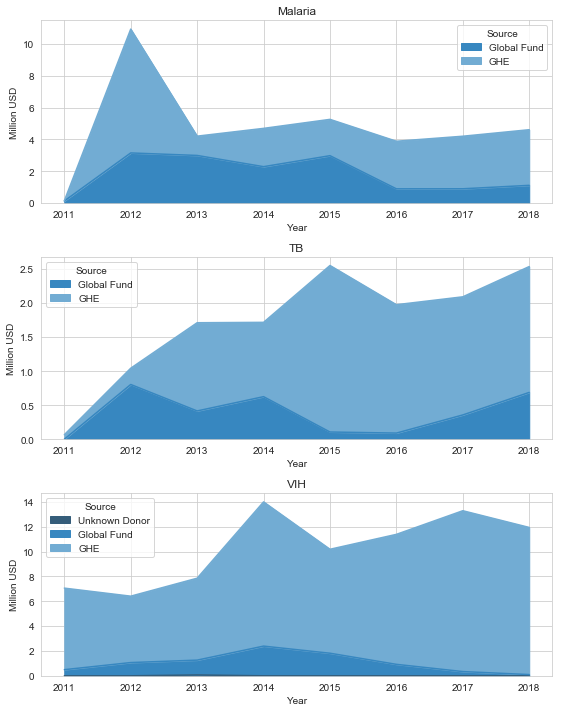

In [24]:
mlp.rcParams['figure.figsize'] = [8, 10]

temp = spendData.groupby(["Year", "disease", "Source"])\
    .DEVENGADO.sum()[lambda x: x>0].unstack([1, 2]).divide(7.5*1000000).sort_index(axis="columns", ascending=False).fillna(0)

levels = temp.columns.get_level_values(1).unique()
pal = sns.color_palette("Blues_d", n_colors = len(levels), )
levelsColors = dict(zip(levels, pal))

for i,disease in zip(range(1,4), ["Malaria", "TB", "VIH"]):
    ax = plt.subplot(3,1,i)
    temp[(disease)].plot.area(ax = ax, color = [levelsColors[x] for x in temp[(disease)].columns.values])
    ax.set_title(disease)
    ax.set_ylabel("Million USD")

plt.tight_layout()

,Monto,DEVENGADO,Disbursement - Expenditure (Gap),Expenditure
Year,,,,
2010.0,9.489981e+06,3.100000e+06,6389980.57,3.100000e+06
2011.0,8.262632e+07,7.780799e+06,74845524.93,7.780799e+06
2012.0,1.054810e+08,4.545244e+07,60028532.48,4.545244e+07
2013.0,1.108623e+08,7.999639e+07,30865906.65,7.999639e+07
2014.0,1.558316e+08,1.197890e+08,36042591.60,1.197890e+08
2015.0,1.730050e+08,1.565839e+08,16421108.50,1.565839e+08
2016.0,1.877582e+08,1.709012e+08,16856982.43,1.709012e+08
2017.0,1.976056e+08,1.828631e+08,14742479.41,1.828631e+08
2018.0,2.108063e+08,1.971101e+08,13696253.20,1.971101e+08


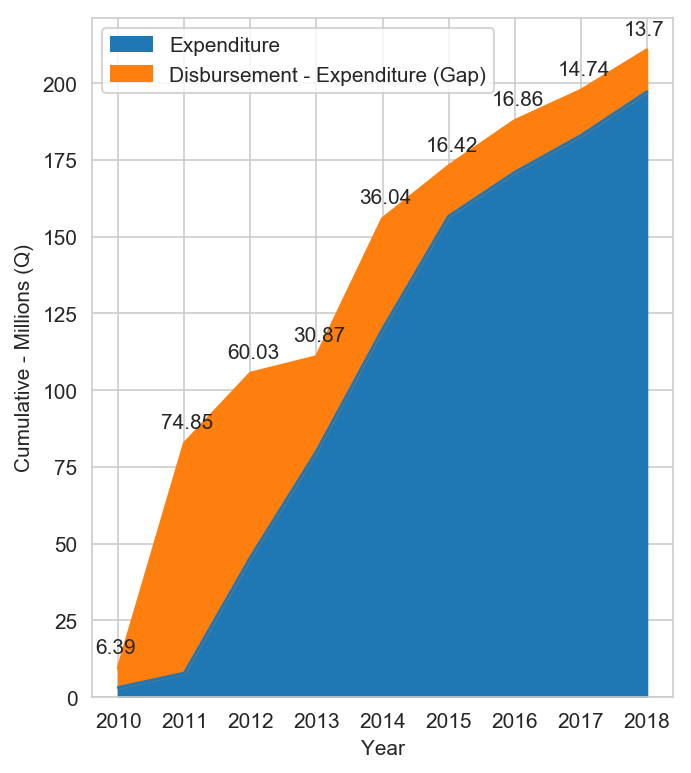

In [57]:
mlp.rcParams["figure.figsize"] = (5,6)
mlp.rcParams["figure.dpi"] = 150
# Comparing input to spending
temp = pd.concat([inputsData.groupby("Year").Monto.sum().cumsum(),
           spendData[spendData.Source == "Global Fund"].groupby("Year").DEVENGADO.sum().cumsum()
          ], 1).fillna(0)
d2010 = 3.1e6
temp["DEVENGADO"] += d2010
temp["Disbursement - Expenditure (Gap)"] = temp.Monto - temp.DEVENGADO
temp["Expenditure"]  =temp.DEVENGADO
(temp/1000000)[["Expenditure", "Disbursement - Expenditure (Gap)"]].plot.area()
for i, row in temp.iterrows():
    plt.text(i-0.35, 5+row.Monto/1000000, str((row["Disbursement - Expenditure (Gap)"]/1e6).round(2)))
plt.ylabel("Cumulative - Millions (Q)")
temp

In [77]:
temp

,Monto,DEVENGADO
Year,,
2010.0,9.489981e+06,0.000000e+00
2011.0,8.262632e+07,4.680799e+06
2012.0,1.054810e+08,4.235244e+07
2013.0,1.108623e+08,7.689639e+07
2014.0,1.558316e+08,1.166890e+08
2015.0,1.730050e+08,1.534839e+08
2016.0,1.877582e+08,1.678012e+08
2017.0,1.976056e+08,1.797631e+08
2018.0,2.108063e+08,1.940101e+08
